## Introduction

In the following notebook, we will be doing a quick statistical analysis of our raw data (GeelyAutoCarPrices_Raw.csv)

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import yaml
import os

**Set Notebook Preferences**

In [16]:
#Set pandas preferences
pd.set_option('display.max_columns', 100)

#Set visualization preferences
plt.style.use('ggplot')


**Read-in Data**

In [3]:
#Change directory to my_config.yaml
os.chdir('C:/Users/kishe/Documents/Data Science/Projects/Python/In Progress/Car_Price_Prediction')

#Read yaml file
from box import Box

with open('my_config.yaml') as file:
    yaml_data= Box(yaml.safe_load(file))

#Read in raw data
auto_data = pd.read_csv(yaml_data.base.path.data)

## Data Overview

**Preview Data**

In [4]:
print('Data shape:',auto_data.shape)
auto_data.head()

Data shape: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
1,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
2,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
3,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
4,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0


**About the Variables**

In [5]:
#View info
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Descriptive Statistics about the Data**

In [6]:
auto_data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


**Missing Data**

In [7]:
auto_data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Exploratory Data Analysis

In [33]:
import src
from src.Visualization.visualize import EDA_Viz
heatmap = EDA_Viz(dataframe=auto_data)

In [34]:
#Reload, delete
import importlib
importlib.reload(src.Visualization.visualize)
heatmap = EDA_Viz(dataframe=auto_data)

In [35]:
#Calculating and adding car volume to auto data
auto_data['carvolume'] = auto_data.carlength * auto_data.carwidth * auto_data.carheight

heatmap = EDA_Viz(dataframe=auto_data)

<AxesSubplot:>

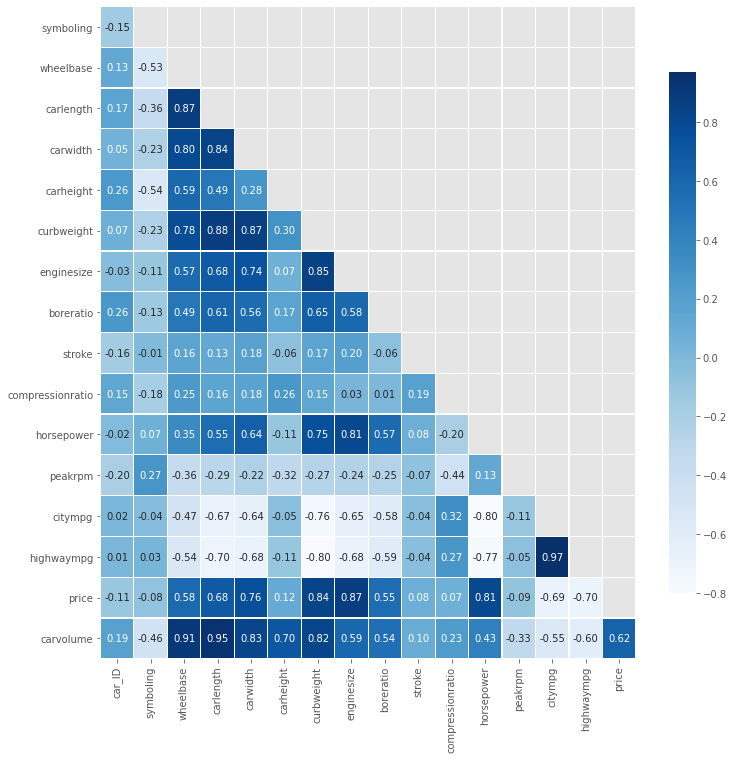

In [36]:
f, ax = plt.subplots(figsize = (12,12))

heatmap.heat_map()

In [14]:
import importlib
importlib.reload(src.Visualization.visualize)
from src.Visualization.visualize import EDA_Viz

<AxesSubplot:xlabel='price', ylabel='Count'>

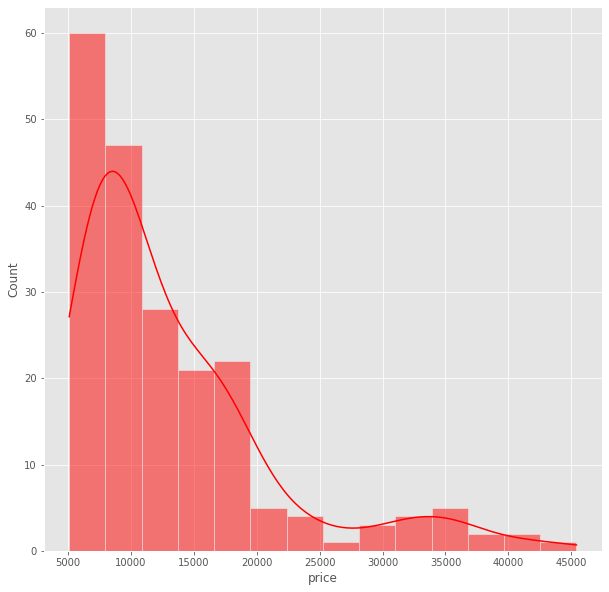

In [17]:
histogram = EDA_Viz(auto_data, color = 'red')

f, ax = plt.subplots(figsize = (10,10))

histogram.histogram(feature='price', ax=ax)

In [13]:
histogram.color

'red'